Title

"Financial and ESG Data Analysis"

Introduction

Background

This project aims to analyze financial and ESG (Environmental, Social, Governance) data for various companies. Understanding the relationship between financial performance and ESG metrics is crucial for investors, policymakers, and companies striving for sustainable growth.

Statement of the Problem

The specific problem addressed in this project is to understand the correlation between financial performance indicators and ESG scores. Additionally, we aim to explore how these variables interact and identify patterns or trends that can inform investment and management decisions.

Data Collection

Data for this project was collected using Python scripts that retrieved financial and ESG data from Yahoo Finance using the yfinance and selenium libraries. The scripts are not included here but were submitted separately.

Descriptive Statistics and Exploratory Analysis


Exploratory Data Analysis (EDA)


Questions to Answer
What is the relationship between ESG scores and financial performance indicators like stock prices and volume?
Are there any observable trends or patterns in the ESG scores across different companies?
How do different components of ESG (Environmental, Social, Governance) correlate with each other?
What are the relationships between key financial metrics (income statements, balance sheets) and ESG scores?

ESG Data Descriptive Statistics:
            Total  Environmental      Social  Governance  Controversy Level
count  551.000000     551.000000  551.000000  551.000000         504.000000
mean    21.699093       5.982033    8.890926    6.819782           1.956349
std      7.047250       5.399669    3.480568    2.405348           0.778743
min      7.100000       0.000000    0.900000    2.400000           1.000000
25%     16.400000       1.800000    6.650000    5.200000           1.000000
50%     21.300000       4.100000    8.800000    6.300000           2.000000
75%     26.100000       9.350000   11.100000    7.900000           2.000000
max     44.900000      27.300000   21.400000   19.400000           5.000000

Stock Data Descriptive Statistics:
                Open           High            Low          Close  \
count  197796.000000  197796.000000  197796.000000  197796.000000   
mean      149.318293     150.901141     147.833420     149.424528   
std       329.719612     333.287013     

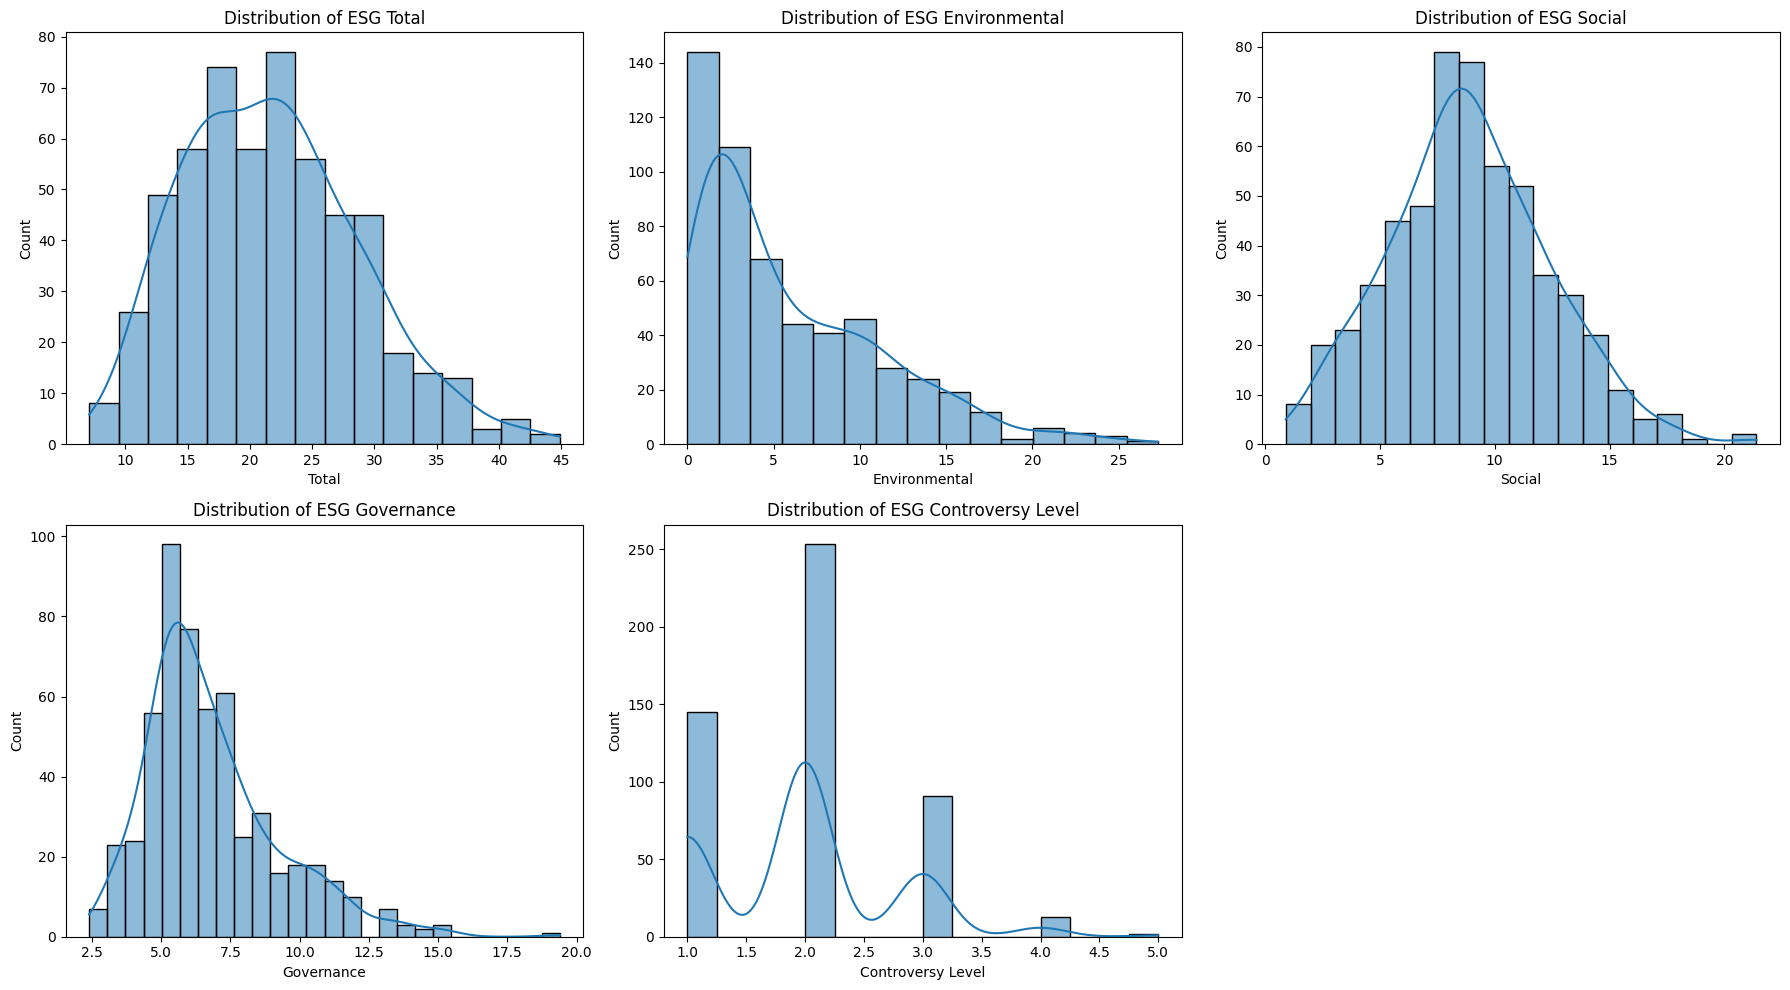

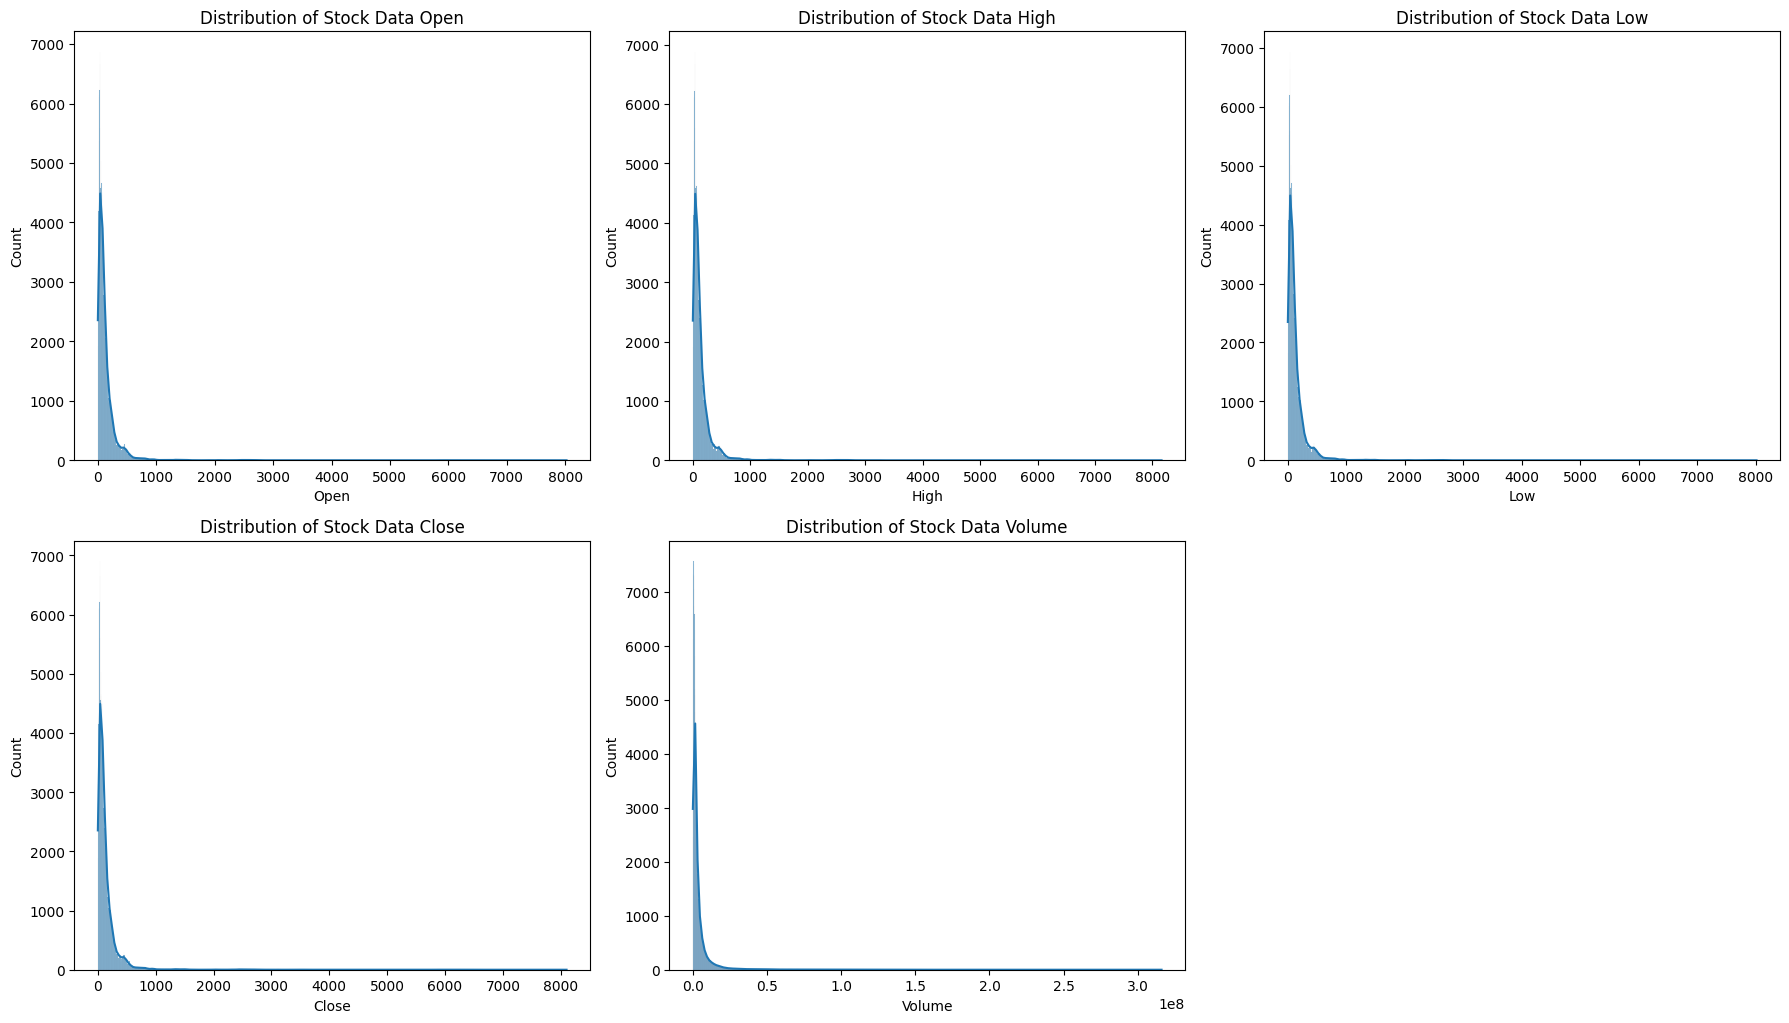


Income Statements Descriptive Statistics:
       Tax Effect Of Unusual Items  Tax Rate For Calcs  Normalized EBITDA  \
count                 3.060000e+03         3060.000000       2.671000e+03   
mean                 -1.219846e+07            0.204432       1.421994e+09   
std                   1.421652e+08            0.080101       3.093545e+09   
min                  -5.202400e+09            0.000000      -8.430000e+09   
25%                  -3.079825e+06            0.168944       2.716000e+08   
50%                   0.000000e+00            0.210000       5.450740e+08   
75%                   0.000000e+00            0.241000       1.313600e+09   
max                   4.056840e+08            0.400000       4.322100e+10   

       Net Income From Continuing Operation Net Minority Interest  \
count                                       3.060000e+03            
mean                                        7.319749e+08            
std                                         2.071825e+09

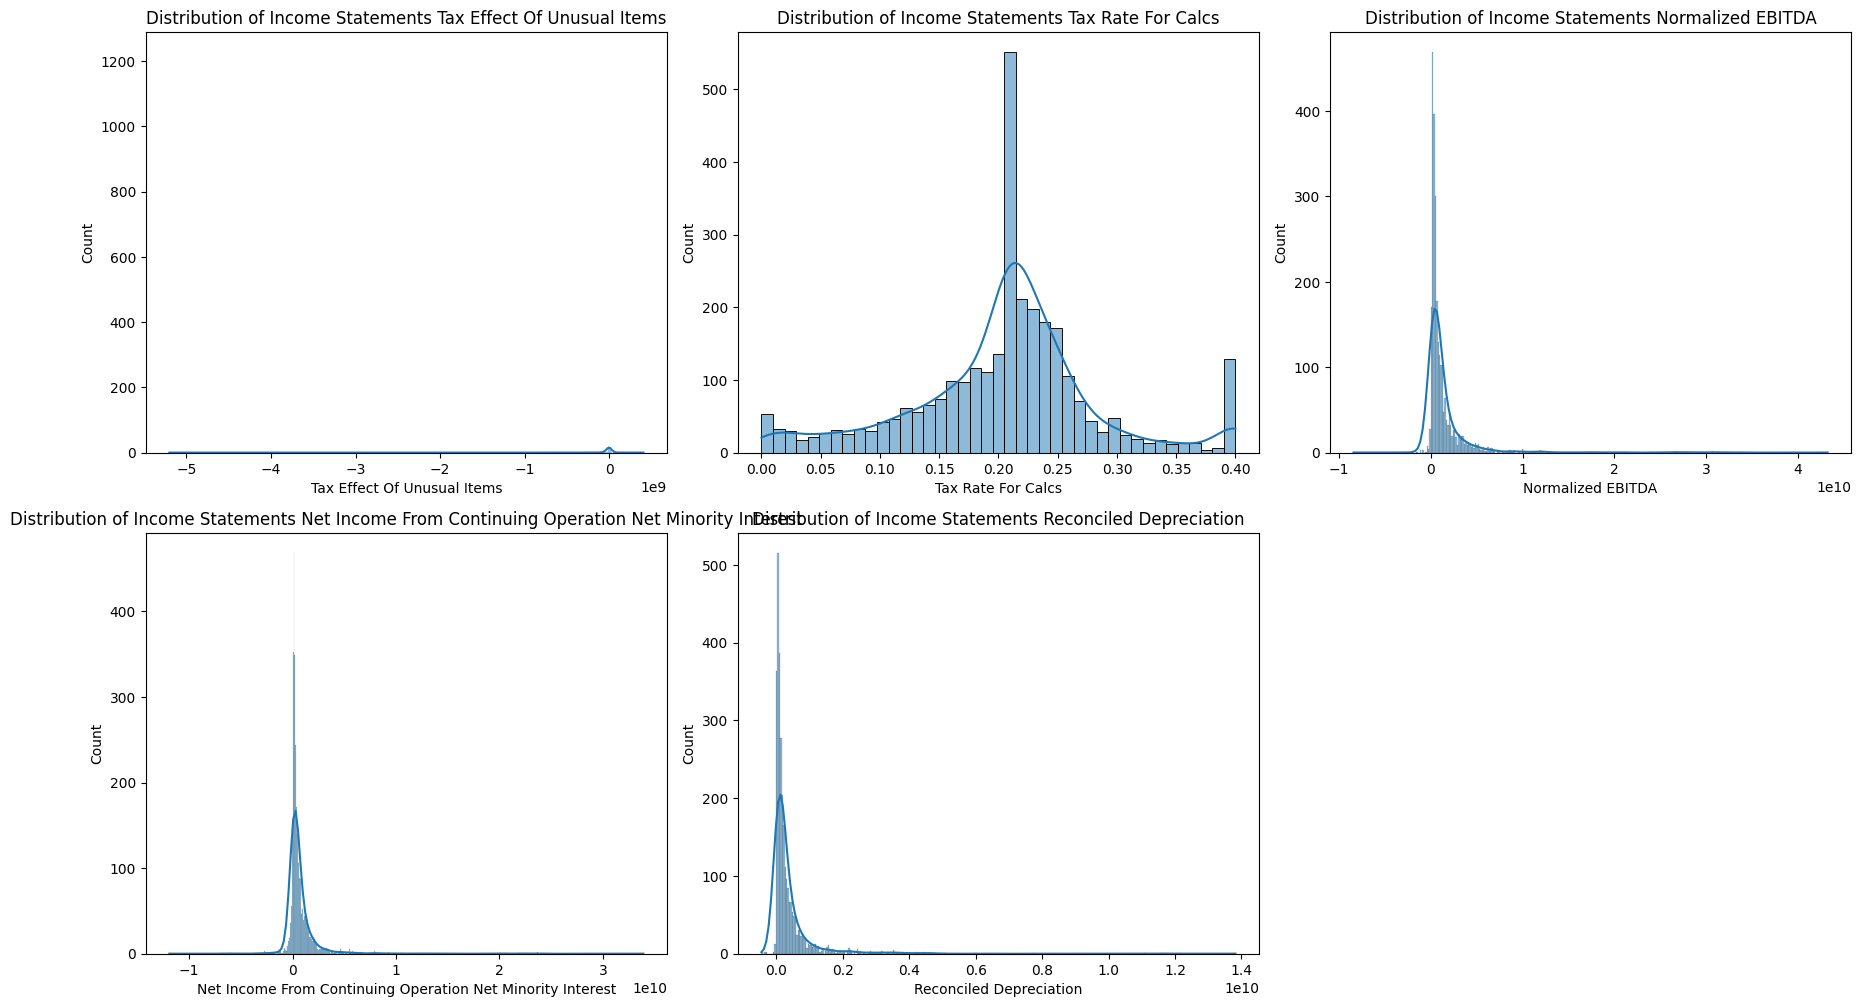


Balance Sheets Descriptive Statistics:
       Ordinary Shares Number  Share Issued      Net Debt    Total Debt  \
count            3.061000e+03  3.061000e+03  2.653000e+03  3.032000e+03   
mean             6.295731e+08  7.363961e+08  1.399871e+10  2.016614e+10   
std              1.265218e+09  1.397966e+09  2.890148e+10  4.731140e+10   
min              3.167625e+06  9.589239e+06  1.970800e+07  1.404000e+06   
25%              1.376815e+08  1.672063e+08  2.027889e+09  3.145130e+09   
50%              2.698400e+08  3.040000e+08  5.424000e+09  6.889150e+09   
75%              5.949060e+08  6.834949e+08  1.292832e+10  1.719575e+10   
max              1.572341e+10  1.572341e+10  3.133490e+11  4.485490e+11   

       Tangible Book Value  Invested Capital  Working Capital  \
count         3.065000e+03      3.062000e+03     2.672000e+03   
mean          6.351396e+09      3.550705e+10     2.198825e+09   
std           2.867588e+10      7.148616e+10     9.479283e+09   
min          -9.834700e+

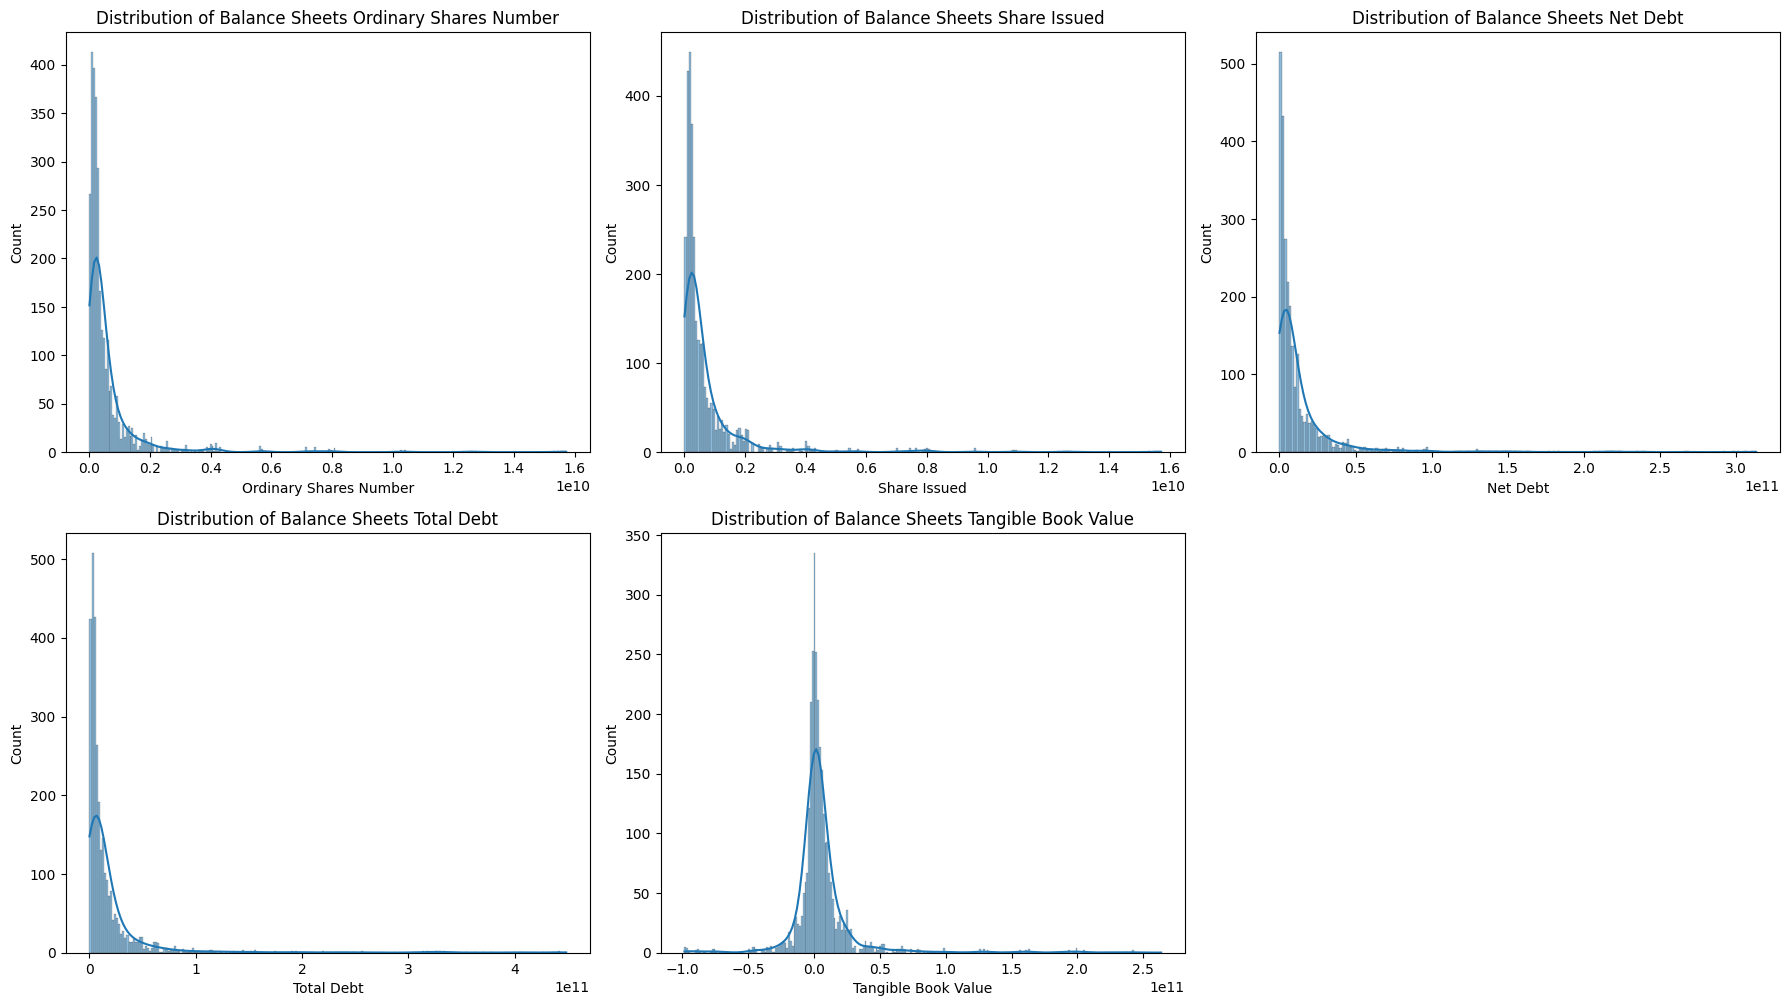

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the saved data
esg_df = pd.read_csv("https://misfer7.github.io/esg_data.csv")
all_stock_data_df = pd.read_csv("https://misfer7.github.io/all_stock_data.csv")
all_income_statements_df = pd.read_csv("https://misfer7.github.io/all_income_statements.csv")
all_balance_sheets_df = pd.read_csv("https://misfer7.github.io/all_balance_sheets.csv")

# Ensure only numeric columns for correlation calculations and plots
esg_numeric = esg_df.select_dtypes(include='number')
stock_data_numeric = all_stock_data_df.select_dtypes(include='number')
income_statements_numeric = all_income_statements_df.select_dtypes(include='number')
balance_sheets_numeric = all_balance_sheets_df.select_dtypes(include='number')

# Descriptive statistics for ESG data
esg_stats = esg_numeric.describe()
print("ESG Data Descriptive Statistics:")
print(esg_stats)

# Descriptive statistics for stock data
stock_data_stats = stock_data_numeric.describe()
print("\nStock Data Descriptive Statistics:")
print(stock_data_stats)

# Function to create distribution plots
def create_distribution_plots(df, title_prefix):
    num_columns = len(df.columns)  # All columns are numeric
    num_rows = np.ceil(num_columns / 3).astype(int)

    plt.figure(figsize=(18, num_rows * 5))
    for i, column in enumerate(df.columns[:5], 1):  # Keep only the first 5 relevant columns
        plt.subplot(num_rows, 3, i)
        sns.histplot(df[column], kde=True)
        plt.title(f'{title_prefix} {column}')
    plt.tight_layout()
    plt.show()

# Distribution plots for ESG data
create_distribution_plots(esg_numeric, 'Distribution of ESG')

# Distribution plots for stock data
create_distribution_plots(stock_data_numeric, 'Distribution of Stock Data')

# Descriptive statistics for income statements
income_statements_numeric = all_income_statements_df.select_dtypes(include='number')
income_statements_stats = income_statements_numeric.describe()
print("\nIncome Statements Descriptive Statistics:")
print(income_statements_stats)

# Function to create distribution plots
def create_distribution_plots(df, title_prefix):
    num_columns = len(df.columns)  # All columns are numeric
    num_rows = np.ceil(num_columns / 3).astype(int)

    plt.figure(figsize=(18, num_rows * 5))
    for i, column in enumerate(df.columns[:5], 1):  # Keep only the first 5 relevant columns
        plt.subplot(num_rows, 3, i)
        sns.histplot(df[column], kde=True)
        plt.title(f'{title_prefix} {column}')
    plt.tight_layout()
    plt.show()

# Distribution plots for income statements
create_distribution_plots(income_statements_numeric, 'Distribution of Income Statements')

# Descriptive statistics for balance sheets
balance_sheets_numeric = all_balance_sheets_df.select_dtypes(include='number')
balance_sheets_stats = balance_sheets_numeric.describe()
print("\nBalance Sheets Descriptive Statistics:")
print(balance_sheets_stats)

# Function to create distribution plots
def create_distribution_plots(df, title_prefix):
    num_columns = len(df.columns)  # All columns are numeric
    num_rows = np.ceil(num_columns / 3).astype(int)

    plt.figure(figsize=(18, num_rows * 5))
    for i, column in enumerate(df.columns[:5], 1):  # Keep only the first 5 relevant columns
        plt.subplot(num_rows, 3, i)
        sns.histplot(df[column], kde=True)
        plt.title(f'{title_prefix} {column}')
    plt.tight_layout()
    plt.show()

# Distribution plots for balance sheets
create_distribution_plots(balance_sheets_numeric, 'Distribution of Balance Sheets')


Correlation Heatmaps

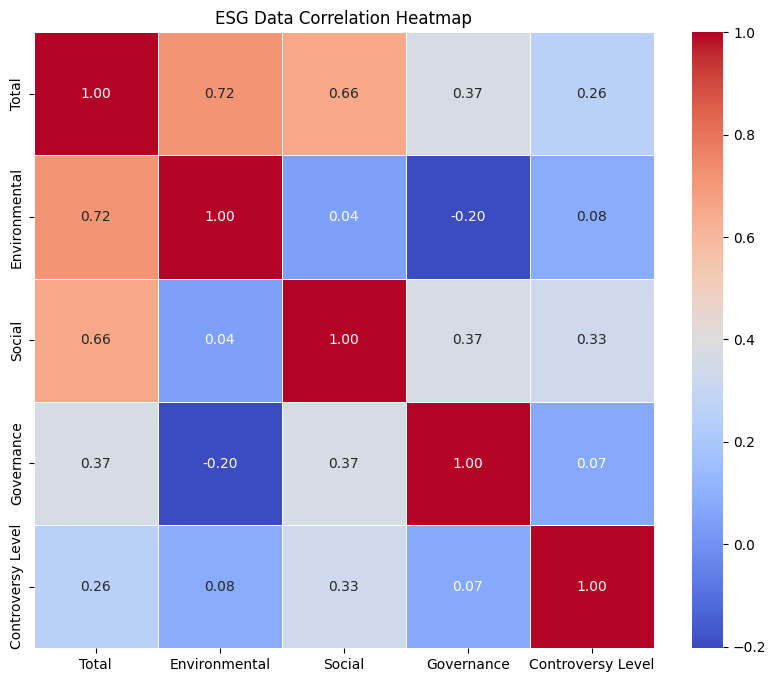

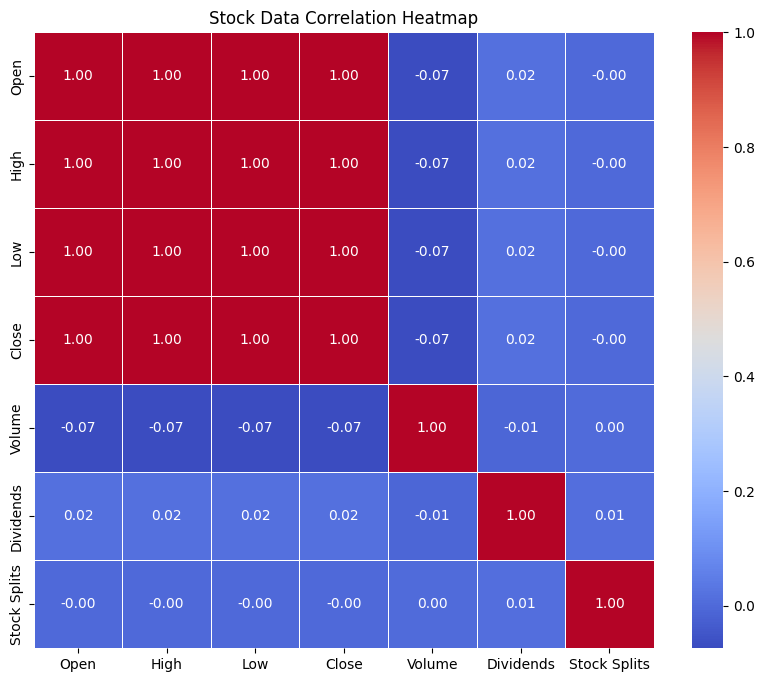

In [11]:
# Function to plot heatmap
def plot_heatmap(data, title):
    corr = data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title(title)
    plt.show()

# Plot heatmaps for ESG data
plot_heatmap(esg_numeric, 'ESG Data Correlation Heatmap')

# Plot heatmaps for stock data
plot_heatmap(stock_data_numeric, 'Stock Data Correlation Heatmap')



Significance of the Project

This analysis provides valuable insights into the relationship between a company's financial performance and its ESG scores. Understanding these correlations can help investors make more informed decisions, guide companies towards more sustainable practices, and inform policy-making aimed at promoting corporate responsibility and sustainability.

References

Yahoo Finance

Pandas Documentation


Seaborn Documentation

Matplotlib Documentation

Note: This analysis and the corresponding code were partly guided by generative AI, specifically ChatGPT by OpenAI. The code and write-up also include collaborative inputs, clearly indicated where applicable.